In [4]:
import tensorflow as tf
import h5py
import numpy as np
import pandas as pd

# Implementation of LeNet-5 network

Input: 32 X 32 X 1 

**Layer 1**: Conv (kernel_size=5, filter=6, stride=1) 

**Layer 2**: Avg Pool (kernel_size=2, stride=2)

**Layer 3**: Conv (kernel_size=5, filter=16, stride=1)

**Layer 4**: Avg Pool (kernel_size=2, stride=2)

**Layer 5**: Dense (120,)

**Layer 6**: Dense (84,)

**Layer 7**: Softmax (10,)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D, AvgPool2D

In [80]:
model = Sequential()

In [81]:
# Size of input changed based on mnist data shape
model.add(Convolution2D(filters=6, input_shape=(28,28,1), kernel_size=5, strides=(1,1), padding='valid'))
model.add(AvgPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Convolution2D(filters=16, kernel_size=5, strides=(1,1), padding='valid'))
model.add(AvgPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [82]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_10 (Dense)             (None, 84)               

In [83]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','mse'])

## Training the model for MNIST database

In [56]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [27]:
from tensorflow.keras.datasets import mnist

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [39]:
X_train.shape

(60000, 28, 28)

In [42]:
X_train.resize((*X_train.shape,1))

In [77]:
X_test.resize((*X_test.shape,1))

In [43]:
X_train.shape

(60000, 28, 28, 1)

In [54]:
y_train.shape

(60000,)

In [57]:
one_hot = OneHotEncoder()

In [66]:
y_train_class = one_hot.fit_transform(y_train.reshape(-1,1))
y_test_class = one_hot.transform(y_test.reshape(-1,1))

In [71]:
y_train_class = y_train_class.toarray()
y_test_class = y_test_class.toarray()

In [72]:
y_train_class.shape

(60000, 10)

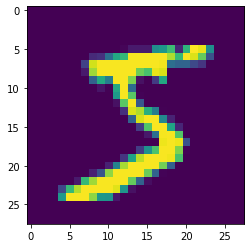

In [73]:
plt.imshow(X_train[0].reshape(X_train.shape[1:3]))

In [84]:
model.fit(X_train, y_train_class, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 183us/sample - loss: 0.4228 - accuracy: 0.9147 - mse: 0.0134
Epoch 2/20
60000/60000 [==============================] - 10s 175us/sample - loss: 0.1630 - accuracy: 0.9524 - mse: 0.0073
Epoch 3/20
60000/60000 [==============================] - 10s 174us/sample - loss: 0.1343 - accuracy: 0.9596 - mse: 0.0061
Epoch 4/20
60000/60000 [==============================] - 11s 183us/sample - loss: 0.1162 - accuracy: 0.9657 - mse: 0.0053
Epoch 5/20
60000/60000 [==============================] - 11s 182us/sample - loss: 0.1027 - accuracy: 0.9695 - mse: 0.0047
Epoch 6/20
60000/60000 [==============================] - 11s 189us/sample - loss: 0.0948 - accuracy: 0.9707 - mse: 0.0044
Epoch 7/20
60000/60000 [==============================] - 11s 186us/sample - loss: 0.0850 - accuracy: 0.9742 - mse: 0.0040
Epoch 8/20
60000/60000 [==============================] - 11s 185us/sample - loss: 0.0819 - accuracy: 0.9761 - mse: 

In [85]:
model.evaluate(X_test, y_test_class)

10000/10000 [==============================] - 1s 90us/sample - loss: 0.1065 - accuracy: 0.9768 - mse: 0.0038


[0.10650579230999356, 0.9768, 0.003806398]